In [2]:
! pip install pandas scikit-learn


In [4]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Outlook_Overcast: 0.31127812445913283
Outlook_Rain: 0.0
Outlook_Sunny: 0.0
Temperature_Cool: 0.3443609377704336
Temperature_Hot: 0.0
Temperature_Mild: 0.0
Humidity_High: 0.0
Humidity_Normal: 0.0
Wind_Strong: 0.0
Wind_Weak: 0.3443609377704336
Accuracy: 1.0


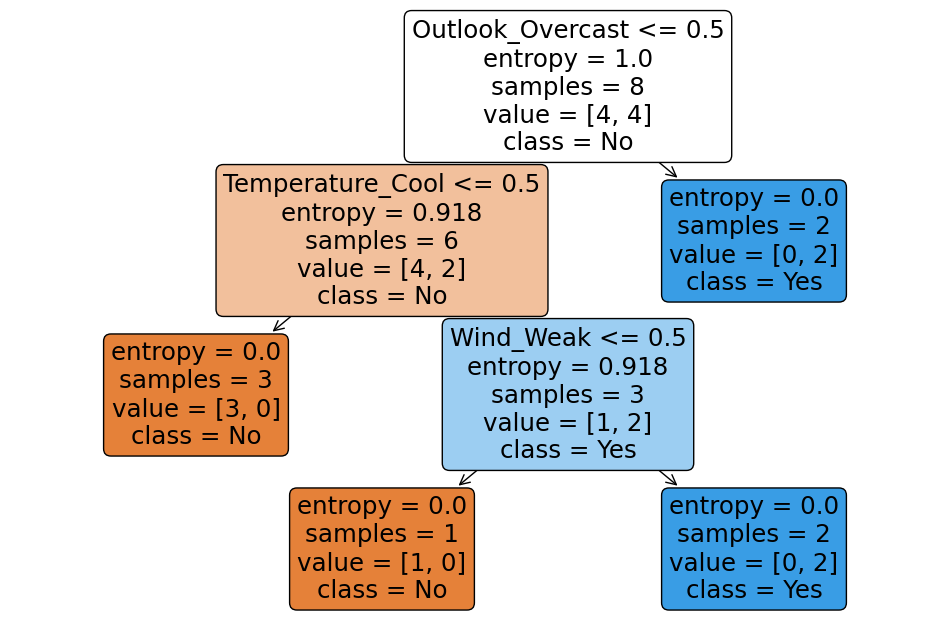

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dataset = pd.read_csv('dataset5.csv')




# Encode categorical features
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))

# Combine encoded features with target variable
df_encoded['PlayTennis'] = df['PlayTennis']

# Split data into features and target variable
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Display feature importances
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance}")

# Evaluate accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()
